# 일진수 자연수와 리스트에 대해 좀더
지난번 HelloHaskell 노트북에서 하스켈 문법 관련해서 빼먹고 설명하지 않은 것이 하나 있는데
함수를 포함한 값에 대한 새로운 이름을 정의할 때 그 이름은 소문자로 시작하는 반면,
타입의 이름이나 어떤 타입과 관련된 상수의 이름은 대문자로 시작한다.

## 인자가 두 개인 함수에서의 수학적귀납법스러운 정의
지난번 HelloHaskell 노트북에서는 일진수 자연수 데이타 타입 `Nat`을 정의하고 일진수 자연수를 컴퓨터에서 제공되는 정수로 변환하는 함수 `nat2int`를 정의해 보았으며 그와 거의 같은 구조를 갖는 `List`의 길이를 구하는 함수 `len`을 정의해 보았다.
하나가 아닌 두 개의 `Nat`이나 `List`를 인자로 받는 함수들,
즉 `Nat`이나 `List`에 대한 이항 함수들 중에도 이와 같이 거의 유사한 구조를 갖는 것들이 있다.
두 개의 인자 둥에 하나를 기준으로 수학적귀납법스럽게 정의할 수 있는 함수들이 있는데,
대표적으로 일진수 자연수의 덧셈 함수와 리스트 이어붙이기 함수가 그러하다.

In [1]:
data Nat  = Z   | S Nat          deriving Show
data List = Nil | Cons Int List  deriving Show

In [2]:
-- 일진수 덧셈
plus :: Nat -> Nat -> Nat
plus Z     m = m            -- induction base
plus (S n) m = S (plus n m) -- inductive step

In [3]:
-- 리스트 두 개를 이어붙이는 함수
append :: List -> List -> List
append Nil         ys = ys -- induction base
append (Cons x xs) ys = Cons x (append xs ys) -- inductive step

In [3]:
two   = S (S Z)
three = S (S (S Z))

plus Z three    -- 결과가 3에 해당하는 일진수
plus two three  -- 결과가 5에 해당하는 일진수

S (S (S Z))

S (S (S (S (S Z))))

In [5]:
list1 = Cons 1 (Cons 2 Nil)
list2 = Cons 3 (Cons 4 (Cons 5 Nil))

append Nil list2    -- 결과가 3,4,5 가 들어있는 리스트
append list1 list2  -- 결과가 1,2,3,4,5 가 들어있는 리스트

Cons 3 (Cons 4 (Cons 5 Nil))

Cons 1 (Cons 2 (Cons 3 (Cons 4 (Cons 5 Nil))))

## 두 개의 인자에 대한 동시 귀납으로 정의되는 함수 
모든 이항 함수가 하나의 인자를 기준으로 하여 귀납적으로 잘 정의되는 것은 아니다.
두 개의 인자에 대해 동시에 귀납단계를 밟는 방식으로 정의하는 것이 자연스러운 함수들도 있다.

In [6]:
-- 두 일진수 중에 작은 값을 돌려주는 함수
minNat Z     m     = Z -- induction base
minNat n     Z     = Z -- induction base
minNat (S n) (S m) = S (minNat n m) -- inductive step

In [7]:
minNat two three
minNat three two

S (S Z)

S (S Z)

In [8]:
plusList Nil         ys          = Nil -- induction base
plusList xs          Nil         = Nil -- induction base
plusList (Cons x xs) (Cons y ys) = Cons (x+y) (plusList xs ys)-- inductive step

In [9]:
plusList list1 list2
plusList list2 list1

Cons 4 (Cons 6 Nil)

Cons 4 (Cons 6 Nil)

---

---

# 과제

---

분반: 03

이름: 김재민

학번: 20130642

---


1. 일진수 곱셈을 계산하는 `mult`를 정의하라. (힌트: 위에서 정의한 `plus` 함수 이용)
1. 일진수 뺄셈을 계산하는 `minus`를 정의하라. 자연수에는 음수가 없으므로 첫 번째 인자보다 두 번째 인자가 더 큰 경우는 Z으로 처리한다. 예컨대 `minus two three`의 계산결과는 Z가 된다.
1. `plusList`와 비슷한 연산을 이진트리에 하는 `plusTree` 함수를 정의해 보라.<br>
   `plusTree`
   <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t1.png' width='200'>
   <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t2.png' width='200'>
   = <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t3.png' width='200'>
1. 좌우를 뒤집은 이진트리를 돌려주는 `mirrorTree` 함수를 정의해 보라<br>
   `mirrorTree`
   <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t4.png' width='200'>
   = <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t5.png' width='200'>


---

# 1. mult

In [4]:
mult :: Nat -> Nat -> Nat
-- 여기에 mult 정의하기

mult Z     m = Z            -- induction base
mult n     Z = Z            -- induction base
mult (S n) m = plus m (mult n m) -- inductive step

---

# 1-1 mult Example 1 - Base Case

---

induction base 1 : mult Z     m = Z  

In [5]:
four = S(S(S(S Z)))
mult Z four

Z

induction base 2 : mult n     Z = Z 

In [6]:
mult two Z

Z

---

# 1-2 mult Example 2

---

In [7]:
five= S(S(S(S(S Z))))
mult four five

S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S Z)))))))))))))))))))

---

# 1-3 mult Example 3

---

In [8]:
seven= S(S(S(S(S(S(S Z))))))
mult four seven

S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S (S Z)))))))))))))))))))))))))))

---

# 2. minus

In [9]:
minus :: Nat -> Nat -> Nat
-- 여기에 minus 정의하기

minus Z     m         = Z -- induction base
minus n     Z         = n -- induction base
minus (S n) (S m)     = minus n m  -- inductive step

---

# 2-1 minus Example 1 - Base Case

---

induction base 1 : minus Z     m         = Z

In [10]:
minus Z four

Z

induction base 2 : minus n     Z         = n

In [11]:
minus five Z

S (S (S (S (S Z))))

---

# 2-2 minus Example 2

---

In [12]:
minus five four

S Z

In [13]:
minus seven two

S (S (S (S (S Z))))

---

# 2-3 minus Example 3

---

In [14]:
minus four five

Z

In [15]:
minus two seven

Z

---

# ※ drawTree

In [16]:
data Tree = Null | Node Int Tree Tree  deriving Show

디버깅을 위한 트리 그림 그리기 함수 drawTree 제공

참고자료: https://stackoverflow.com/questions/30667522/using-diagrams-library-in-haskell-draw-binary-trees

In [17]:
:extension NoMonomorphismRestriction FlexibleContexts TypeFamilies
import Diagrams.Prelude

drawTree t = diagram (diagTree t)

diagTree = go [] where
  go nm Null         = diagNode "Null" # named nm
  go nm (Node x l r) = 
    connectOutside nm nmL .
    connectOutside nm nmR $
          nx
          ===
      (nl ||| nr) # centerX
    where
      (nmL, nmR) = ('L':nm, 'R':nm)
      nx = diagNode (show x) # named nm 
      nl = go nmL l # named nmL
      nr = go nmR r # named nmR
      
label (Node n _ _) = n
left (Node _ t1 _) = t1
right (Node _ _ t2) = t2
leaf n = Node n Null Null

diagNode txt = text txt # fontSizeL 0.5 <> circle 1 & pad 2

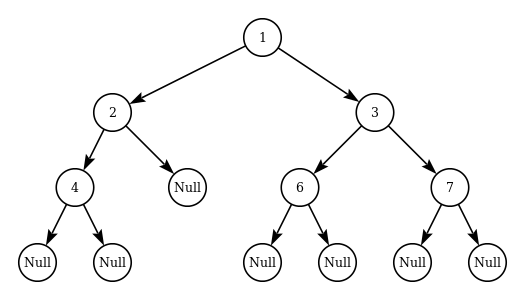

In [18]:
tree1 = Node 1 (Node 2 (Node 4 Null Null) Null) (Node 3 (Node 6 Null Null) (Node 7 Null Null))

drawTree tree1

---

# 3. plusTree 


In [19]:
plusTree :: Tree -> Tree -> Tree
-- 여기에 plusTree 정의하기
plusTree Null         yt          = Null -- induction base
plusTree xt          Null         = Null -- induction base
plusTree (Node x xlt xrt) (Node y ylt yrt) = Node (x+y) (plusTree xlt ylt)(plusTree xrt yrt) -- inductive step

---

# 3-1 plusTree Example 1 - Base Case

---

induction base 1 : plusTree Null         yt          = Null

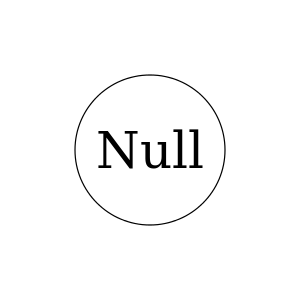

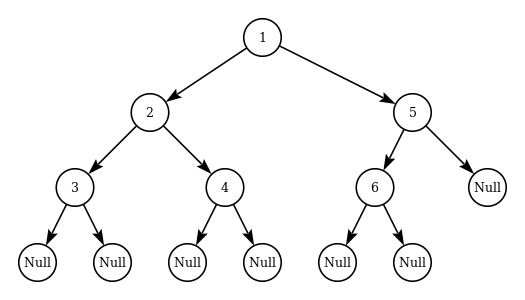

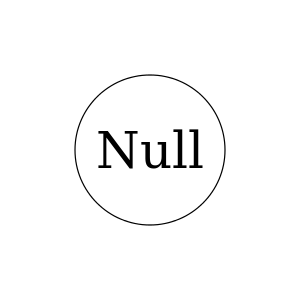

In [26]:
plus1x = Node 1 ( Node 2 ( Node 3 Null Null ) Null ) ( Node 5 ( Node 6 Null Null ) (Node 7 Null Null))
plus1y = Node 1 ( Node 2 ( Node 3 Null Null ) ( Node 4 Null Null ) ) ( Node 5 ( Node 6 Null Null ) Null)

plusBase1Result= plusTree Null plus1y
drawTree Null
drawTree plus1y
drawTree plusBase1Result

----

induction base 2 : plusTree xt          Null         = Null 

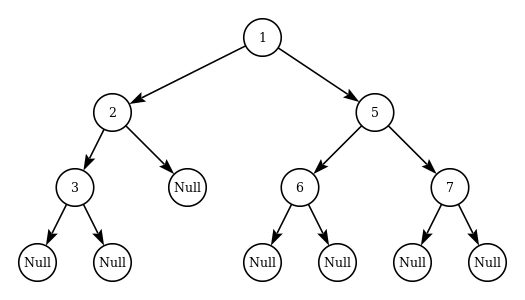

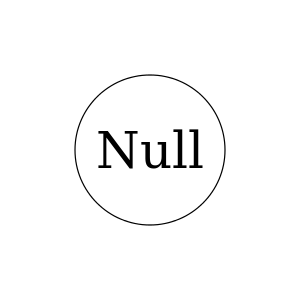

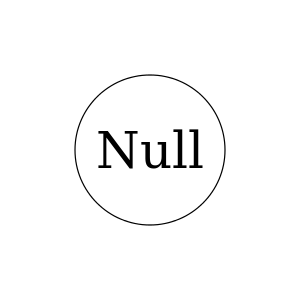

In [27]:
plusBase2Result= plusTree plus1x Null 

drawTree plus1x
drawTree Null
drawTree plusBase2Result

---

# 3-2 plusTree Example 2

---

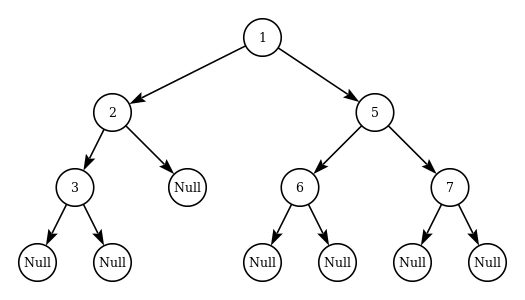

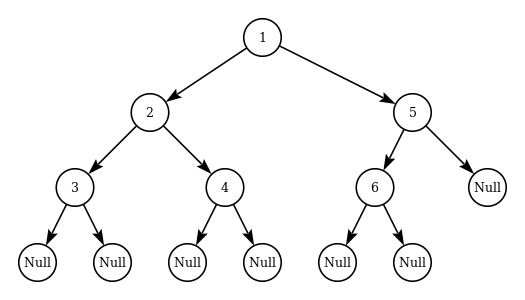

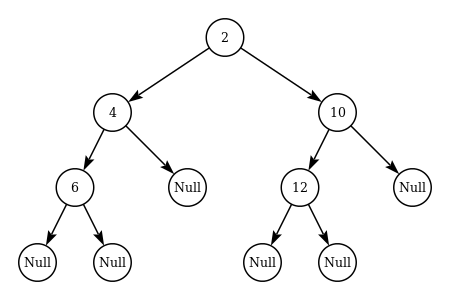

In [28]:

plusResult= plusTree plus1x plus1y
drawTree plus1x
drawTree plus1y
drawTree plusResult

---

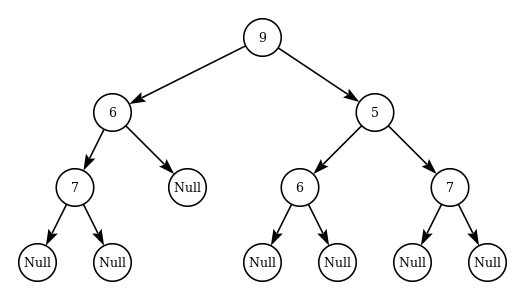

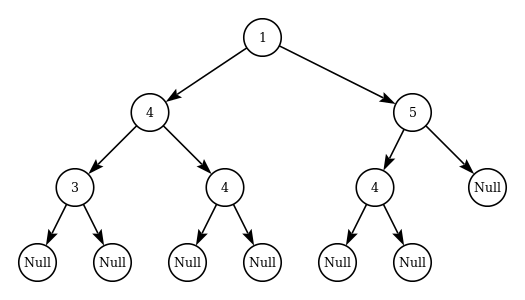

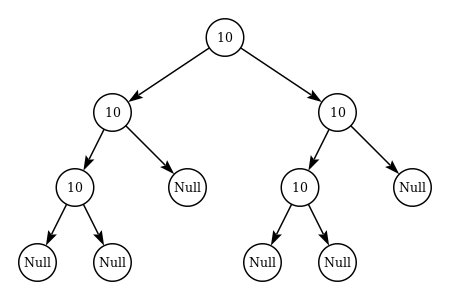

In [29]:
plus2x = Node 9 ( Node 6 ( Node 7 Null Null ) Null ) ( Node 5 ( Node 6 Null Null ) (Node 7 Null Null))
plus2y = Node 1 ( Node 4 ( Node 3 Null Null ) ( Node 4 Null Null ) ) ( Node 5 ( Node 4 Null Null ) Null)

plusResult2= plusTree plus2x plus2y
drawTree plus2x
drawTree plus2y
drawTree plusResult2

---

# 3-3 plusTree Example 3

---

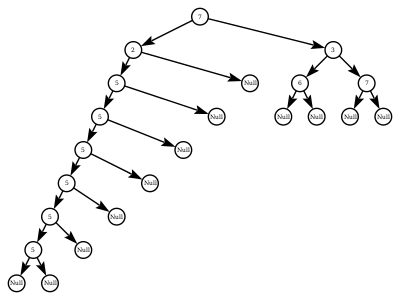

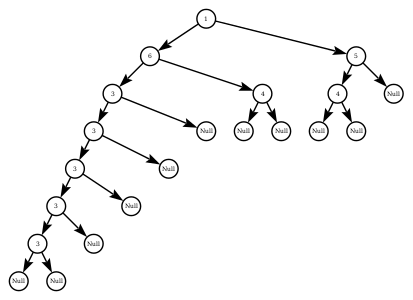

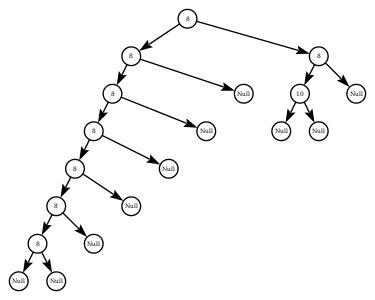

In [30]:
plus3x = Node 7 (Node 2 (Node 5 (Node 5 (Node 5 (Node 5 (Node 5 (Node 5 Null Null) Null) Null) Null) Null) Null) Null) (Node 3 (Node 6 Null Null) (Node 7 Null Null))
plus3y = Node 1 ( Node 6 ( Node 3 ( Node 3 ( Node 3 ( Node 3 ( Node 3 Null Null ) Null ) Null ) Null ) Null ) ( Node 4 Null Null ) ) ( Node 5 ( Node 4 Null Null ) Null)

plusResult3= plusTree plus3x plus3y
drawTree plus3x
drawTree plus3y
drawTree plusResult3

---

# 4. mirrorTree


In [31]:
mirrorTree :: Tree -> Tree
-- 여기에 mirrorTree 정의하기
--mirrorTree (Node x Null ys) = Node x (mirrorTree ys) (mirrorTree Null)
--mirrorTree (Node y xs Null) = Node y (mirrorTree Null) (mirrorTree xs)
--mirrorTree (Node x xs ys) = Node x (mirrorTree ys) (mirrorTree xs) 

mirrorTree (Node x Null Null) = (Node x Null Null)  -- induction base
mirrorTree (Node x Null yt) = (Node x  (mirrorTree yt) Null)  -- induction base
mirrorTree (Node y xt Null) = (Node y Null (mirrorTree xt))  -- induction base
mirrorTree (Node x xt yt) = Node x (mirrorTree yt) (mirrorTree xt) -- inductive step

---

# 4-1 mirrorTree Example 1 - Base Case

---

induction base 1 :mirrorTree (Node x Null Null) = (Node x Null Null)

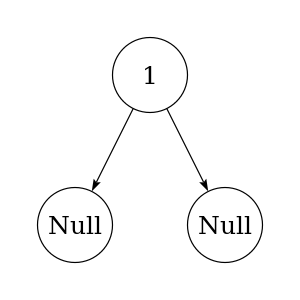

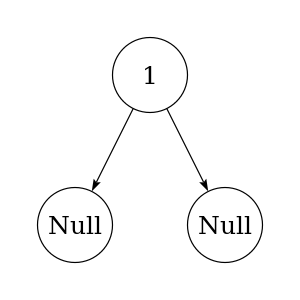

In [32]:
mirrorBase1= Node 1 Null Null
--drawTree tree1
mirrorBase1Result=mirrorTree mirrorBase1
drawTree mirrorBase1
drawTree mirrorBase1Result

---

induction base 2 :mirrorTree (Node x Null yt) = (Node x  (mirrorTree yt) Null)

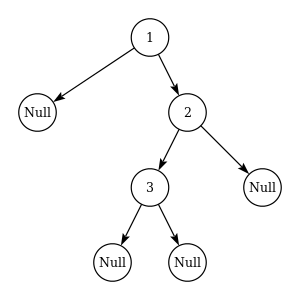

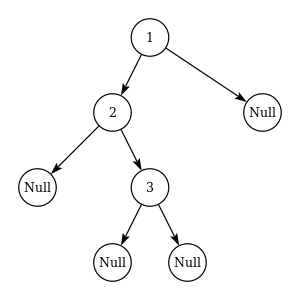

In [33]:
mirrorBase2= Node 1 Null (Node 2 ( Node 3 Null Null ) Null)
--drawTree tree1
mirrorBase2Result=mirrorTree mirrorBase2
drawTree mirrorBase2
drawTree mirrorBase2Result

---

induction base 3 : mirrorTree (Node y xt Null) = (Node y Null (mirrorTree xt))

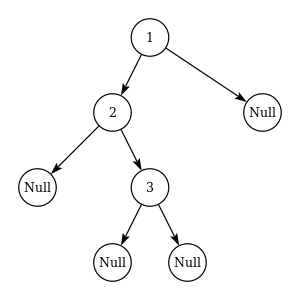

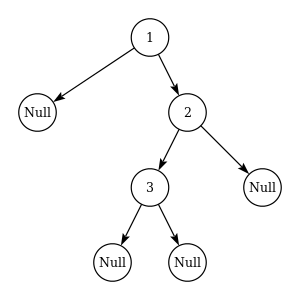

In [34]:
mirrorBase3= Node 1 (Node 2 Null ( Node 3 Null Null ) ) Null 
--drawTree tree1
mirrorBase3Result=mirrorTree mirrorBase3
drawTree mirrorBase3
drawTree mirrorBase3Result

---

# 4-2 mirrorTree Example 2

---

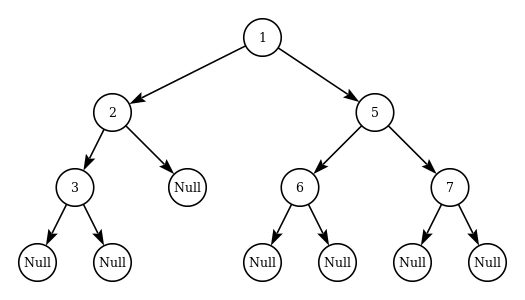

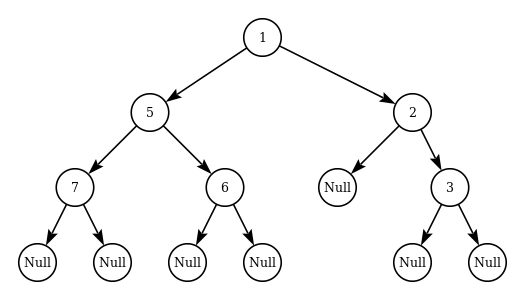

In [35]:
mirror=Node 1 ( Node 2 ( Node 3 Null Null ) Null ) ( Node 5 ( Node 6 Null Null ) (Node 7 Null Null))
--drawTree tree1
result=mirrorTree mirror
drawTree mirror
drawTree result

---

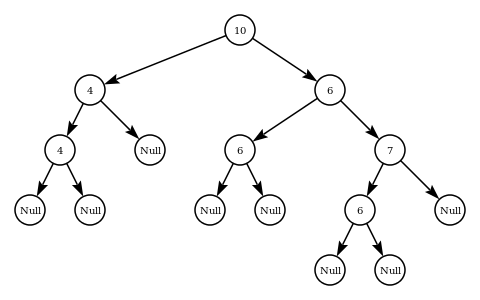

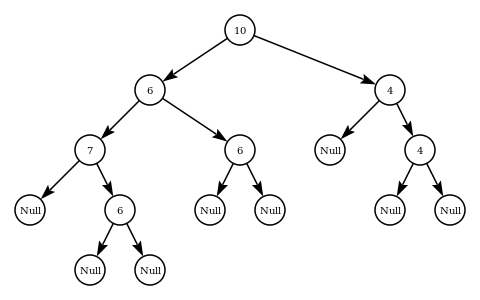

In [36]:
mirror2=Node 10 (Node 4 (Node 4 Null Null) Null) (Node 6 (Node 6 Null Null) (Node 7 (Node 6 Null Null) Null))
--drawTree tree1
result2=mirrorTree mirror2
drawTree mirror2
drawTree result2

---

# 4-3 mirrorTree Example 3

---

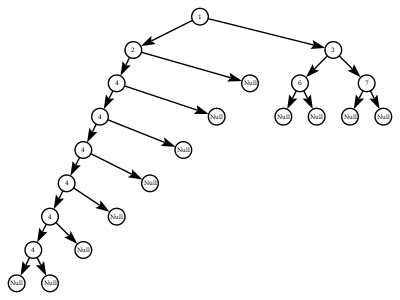

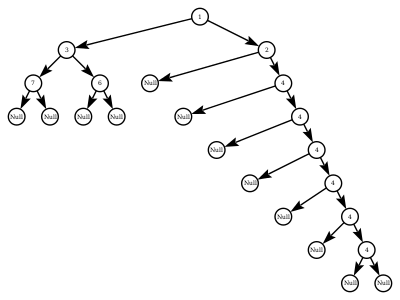

In [37]:
mirror3=Node 1 (Node 2 (Node 4 (Node 4 (Node 4 (Node 4 (Node 4 (Node 4 Null Null) Null) Null) Null) Null) Null) Null) (Node 3 (Node 6 Null Null) (Node 7 Null Null))
--drawTree tree1
result3=mirrorTree mirror3
drawTree mirror3
drawTree result3

---

# review



 가상머신 설치에서부터 여러 자료구조를 하스켈로 구현해보는 동안 여러 시행착오가 많아 힘들었습니다. 


 하지만 파이콘 페이스북 페이지에서 말로만 듣던 주피터, 하스켈을 사용해보는 기회와, 

가상머신을 다루고 자료구조를 익혀보는 기회를 가질 수 있어서 보람차고 기쁩니다.


 무엇보다, 어려웠던 문제를 PC실에서 친구들과 같이 고민하며 문제를 해결했던 희열과 추억은 

잊지 못할 것 같습니다. 감사합니다!